In [1]:
%pip install qiskit==1.2.4
%pip install qiskit-aer==0.15.1
%pip install pylatexenc==2.10


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


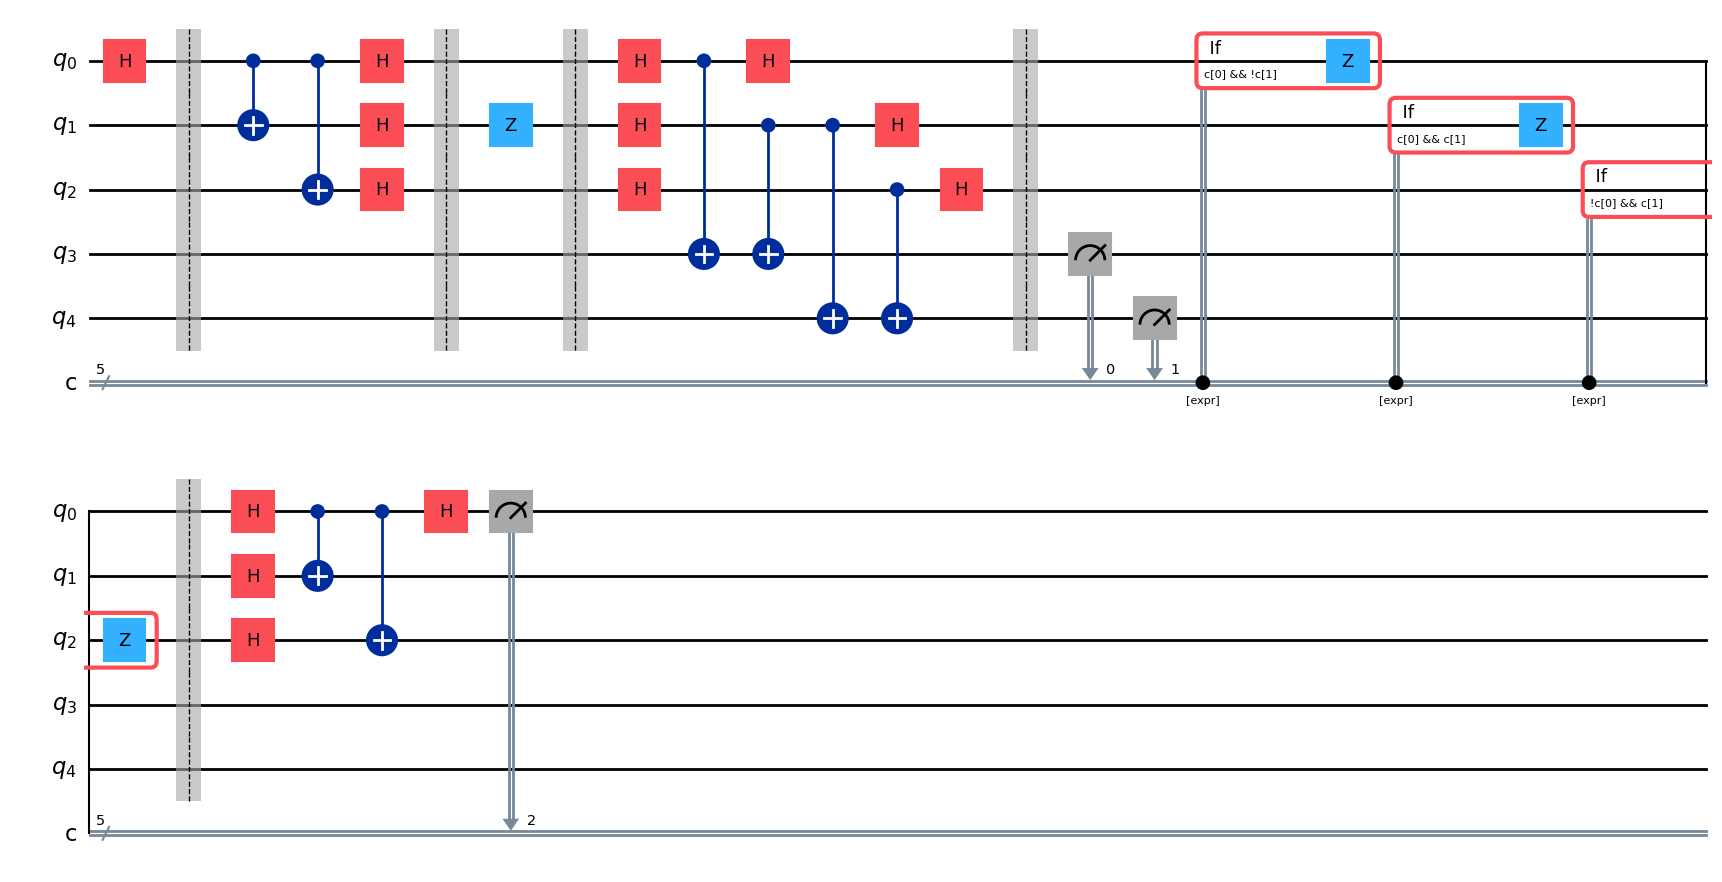

In [6]:
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_gate
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit import transpile 
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_counts
from qiskit.circuit import ControlledGate
from qiskit.circuit.classical import expr
import math 

# Three qubit phase-flip error-correcting code

flip = QuantumCircuit(5,5) 

# qubit 0 is the one we are trying to send
# qubits 1 and 2 are used for the encoding
# qubits 3 and 4 are used for the error syndrome
# classical bits 0 and 1 are used for the syndrome measurement
# classical bits 2, 3 and 4 are for a final measurement to check the statistics

# Put the qubit we are trying to send into state |+>. A phase flip changes this state to |->.
# In order to check that the error has been corrected, we should do a diagonal basis 
# measurement at the end.

flip.h(0) 

# Introduce barriers to help with visualisation

flip.barrier() 

# Encode qubit 0 onto qubits 1 and 2

flip.cx(0,1) 
flip.cx(0,2)
flip.h(0)
flip.h(1)
flip.h(2)

# Another barrier

flip.barrier() 

# Add a phase-flip error
# Try errors on the other qubits, and check that the code corrects any single bit flip error.
# What happens if you flip two qubits?
# What happens if you introduce a phase flip error?

flip.z(1)

# Another barrier

flip.barrier() 

# Syndrome measurements

flip.h(0)
flip.h(1)
flip.h(2)
flip.cx(0,3) 
flip.cx(1,3) 
flip.cx(1,4) 
flip.cx(2,4)
flip.h(0)
flip.h(1)
flip.h(2)

flip.barrier() 

flip.measure([3,4],[0,1])

# Conditional application of Z to qubits 0, 1 and 2
# if c0 and not c1 then Z(q0)
# if c0 and c1 then Z(q1)
# if not c0 and c1 then Z(q2)

with flip.if_test(expr.logic_and(flip.clbits[0],expr.logic_not(flip.clbits[1]))): 
    flip.z(0)

with flip.if_test(expr.logic_and(flip.clbits[0],flip.clbits[1])):
    flip.z(1)

with flip.if_test(expr.logic_and(expr.logic_not(flip.clbits[0]),flip.clbits[1])): 
    flip.z(2)

flip.barrier() 

# Now reverse the encoding so that we get the original state on qubit 0,
# with qubits 1 and 2 disentangled and in state |0>

flip.h(0)
flip.h(1)
flip.h(2)
flip.cx(0,1) 
flip.cx(0,2)

# A phase flip would change |+> to |->, so let's measure qubit 0 in the diagonal basis.
# If the original state was |+> we are expecting a consistent result of 0 from the diagonal
# basis measurement.

flip.h(0)
flip.measure([0],[2]) # Put the result into classical bit 2; we have already used 0 and 1.

# Check the circuit

flip.draw("mpl")



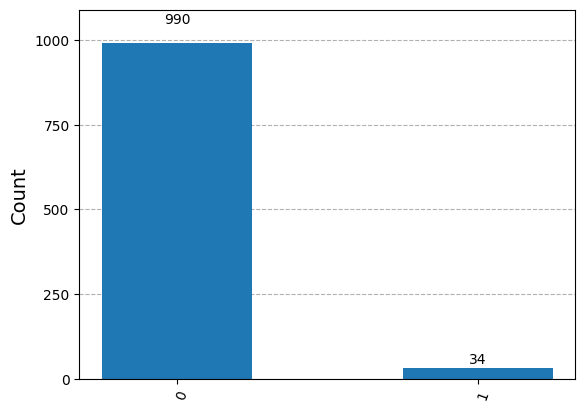

In [8]:
# Simulate and plot results

backend = GenericBackendV2(num_qubits=5, control_flow=True)
compiled = transpile(flip, backend)
job_sim = backend.run(compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(compiled)
# We only want to see the results for bit 2
mcounts = marginal_counts(counts,indices=[2]) 
plot_histogram(mcounts)